Dream Housing Finance société de crédit spécialisée dans les prêts immobiliers. Ils sont présents dans toutes les zones urbaines, semi-urbaines et rurales. Pour chaque client demandeur de prêt au logement l'entreprise doit vérifier l'éligibilité de ce dernier.

L'entreprise souhaite automatiser le processus d'admissibilité au prêt en fonction des renseignements fournis par le client au moment de remplir le formulaire de demande en ligne. 

Ces détails sont le sexe, l'état civil, les études, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres. Pour automatiser ce processus, ils ont donné un problème pour identifier les segments de clients, ceux qui sont éligibles pour le prêt afin qu'ils puissent cibler spécifiquement ces clients. Ils ont fourni ici un ensemble partiel de données.

La variable à prédire est donc *Loan_Status*.


Ci-après le détail des données:

**The Data**  

*Variable* 	: *Description* 

Loan_ID: 	Unique Loan ID     
Gender: 	Male/ Female  
Married: 	Applicant married (Y/N)  
Dependents: 	Number of dependents  
Education: 	Applicant Education (Graduate/ Under Graduate)  
Self_Employed: 	Self employed (Y/N)  
ApplicantIncome: 	Applicant income  
CoapplicantIncome: 	Coapplicant income    
LoanAmount 	Loan: amount in thousands  
Loan_Amount_Term: 	Term of loan in months  
Credit_History: 	credit history meets guidelines  
Property_Area: 	Urban/ Semi Urban/ Rural  
Loan_Status: 	Loan approved (Y/N)  

**Challenge:**


Réalisez une analyse graphique pour explorer les données.  
Faites un premier modèle pour prédire la variable cible, vous évalurez la performance de ce modèle à l'aide d'une validation croisée à 5 couches.


In [59]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/shri1407/Loan-Prediction-Dataset/master/train.csv"
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit('Gender')
#LabelEncoder()
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['Married'].replace(['Yes', 'No'], [0, 1], inplace=True)
df['Education'].replace(['Graduate', 'Not Graduate'], [0, 1], inplace=True)
df['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'], [0, 1, 2], inplace=True)
df['Self_Employed'].replace(['Yes', 'No'], [0, 1], inplace=True)

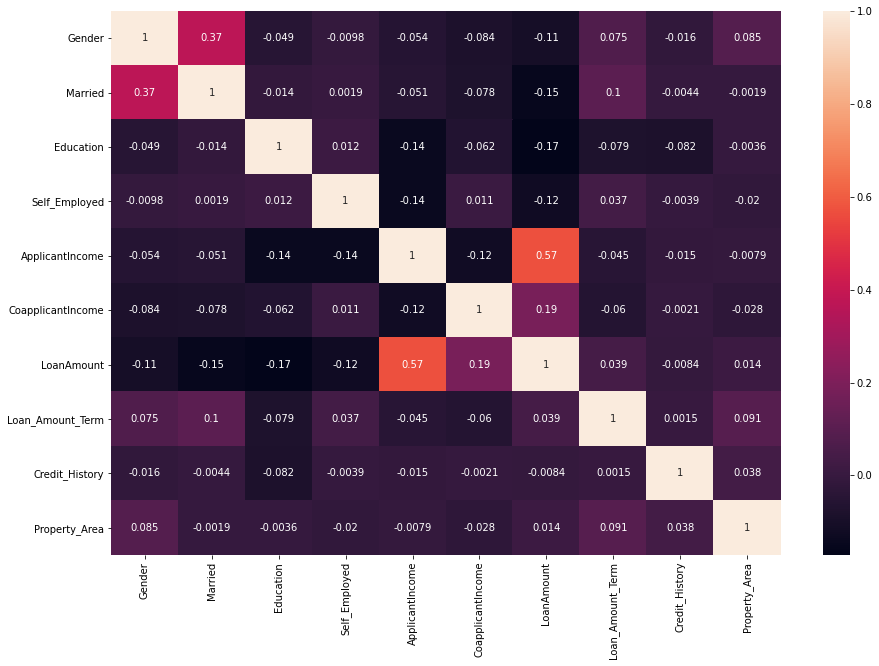

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)

In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,1.0,0,0,1.0,5849,0.0,NaN,360.0,1.0,0,Y
1,LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1,N
2,LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,1.0,0,0,1.0,2900,0.0,71.0,360.0,1.0,1,Y
610,LP002979,0.0,0.0,3+,0,1.0,4106,0.0,40.0,180.0,1.0,1,Y
611,LP002983,0.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0,Y
612,LP002984,0.0,0.0,2,0,1.0,7583,0.0,187.0,360.0,1.0,0,Y


In [66]:
df = df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1,N
2,LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0,Y
5,LP001011,0.0,0.0,2,0,0.0,5417,4196.0,267.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,1.0,0,0,1.0,2900,0.0,71.0,360.0,1.0,1,Y
610,LP002979,0.0,0.0,3+,0,1.0,4106,0.0,40.0,180.0,1.0,1,Y
611,LP002983,0.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0,Y
612,LP002984,0.0,0.0,2,0,1.0,7583,0.0,187.0,360.0,1.0,0,Y


In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
#df['Dependents'].unique()

In [0]:
df = df.drop([610])

In [74]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [75]:
from sklearn.model_selection import train_test_split

#La variable à prédire est donc Loan_ID.

X=df[["Gender",	"Married",	"Education",	"Self_Employed",	"ApplicantIncome",	"CoapplicantIncome",	"LoanAmount",	"Loan_Amount_Term",	"Credit_History",	"Property_Area"]]
y = df['Loan_Status']
#"Dependents"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size = 0.75)

print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 479
The length of the train dataset is   : 359
The length of the test dataset is    : 120


In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[15 22]
 [ 2 81]]
0.8


In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X , y , cv=5 , scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.80208333, 0.78125   , 0.77083333, 0.86458333, 0.77894737])